<a href="https://colab.research.google.com/github/sunday1284/Corab1/blob/main/9%EC%9E%A5_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%EC%96%B8%EC%96%B4_%EC%82%AC%EC%9D%B4%EC%9D%98_%EC%97%B0%EA%B4%80_%EA%B7%9C%EC%B9%99_%EB%B6%84%EC%84%9D_ipynb%EC%9D%98_full_stack1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 판다스 라이브러리 탑재
import pandas as pd

# CSV 파일 읽어오기
raw_data = pd.read_csv('/content/survey_results_public.csv')

# 데이터프레임 정보 확인하기
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [4]:
# 일부 데이터 확안하기
raw_data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [5]:
# 개발자 타입 열 데이터 확인하기
raw_data['DevType']

0                                                      NaN
1                                                      NaN
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [6]:
# 문자열을 리스트로 변환
dev_type = raw_data['DevType'].str.split(';')
dev_type

0                                                      NaN
1                                                      NaN
2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 73268, dtype: object

In [7]:
dev_type.head()

0                                                  NaN
1                                                  NaN
2    [Data scientist or machine learning specialist...
3                              [Developer, full-stack]
4    [Developer, front-end, Developer, full-stack, ...
Name: DevType, dtype: object

In [8]:
# 결손치 제거
dev_type.dropna(inplace=True)
dev_type

2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
7                         [Developer, full-stack, Student]
8                                    [Developer, back-end]
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

In [9]:
# 리스트 항목을 각 열로 나누기
exploded_dev_type = dev_type.explode()
exploded_dev_type

2        Data scientist or machine learning specialist
2                                 Developer, front-end
2                                       Engineer, data
2                           Engineer, site reliability
3                                Developer, full-stack
                             ...                      
73267                         Data or business analyst
73267                                         Designer
73267                                        Scientist
73267                                  Product manager
73267                             System administrator
Name: DevType, Length: 164790, dtype: object

In [10]:
exploded_dev_type.head()

2    Data scientist or machine learning specialist
2                             Developer, front-end
2                                   Engineer, data
2                       Engineer, site reliability
3                            Developer, full-stack
Name: DevType, dtype: object

In [11]:
dev_type.head()

2    [Data scientist or machine learning specialist...
3                              [Developer, full-stack]
4    [Developer, front-end, Developer, full-stack, ...
7                     [Developer, full-stack, Student]
8                                [Developer, back-end]
Name: DevType, dtype: object

In [12]:
# 유일한 값 확인하기
exploded_dev_type.unique()

array(['Data scientist or machine learning specialist',
       'Developer, front-end', 'Engineer, data',
       'Engineer, site reliability', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Student', 'Developer, mobile',
       'Educator', 'Engineering manager', 'Database administrator',
       'Academic researcher', 'DevOps specialist',
       'Other (please specify):',
       'Developer, embedded applications or devices',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Designer', 'Scientist', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Blockchain', 'Marketing or sales professional',
       'Security professional'], dtype=object)

In [13]:
# 데이터 분석가 데이터만 추출하기
data_analyst_data = raw_data[raw_data['DevType'].isin(['Developer, full-stack'])]
data_analyst_data['DevType']

3        Developer, full-stack
12       Developer, full-stack
15       Developer, full-stack
16       Developer, full-stack
21       Developer, full-stack
                 ...          
73233    Developer, full-stack
73244    Developer, full-stack
73251    Developer, full-stack
73255    Developer, full-stack
73261    Developer, full-stack
Name: DevType, Length: 7142, dtype: object

In [14]:
# 프로그래밍 언어 데이터 추출
languages = data_analyst_data['LanguageHaveWorkedWith']
# 데이터 확인
languages

3                             C#;JavaScript;SQL;TypeScript
12                    C;HTML/CSS;Rust;SQL;Swift;TypeScript
15           Bash/Shell;HTML/CSS;JavaScript;SQL;TypeScript
16                                    C#;Java;PHP;Python;R
21                                   Python;SQL;TypeScript
                               ...                        
73233                                     C#;F#;JavaScript
73244                              HTML/CSS;JavaScript;PHP
73251    Java;JavaScript;Python;Ruby;Scala;Swift;TypeSc...
73255    Bash/Shell;C#;HTML/CSS;JavaScript;Perl;PowerSh...
73261    Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...
Name: LanguageHaveWorkedWith, Length: 7142, dtype: object

In [15]:
# 데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(';')

# 데이터 확인
languages

3                        [C#, JavaScript, SQL, TypeScript]
12             [C, HTML/CSS, Rust, SQL, Swift, TypeScript]
15       [Bash/Shell, HTML/CSS, JavaScript, SQL, TypeSc...
16                              [C#, Java, PHP, Python, R]
21                               [Python, SQL, TypeScript]
                               ...                        
73233                                 [C#, F#, JavaScript]
73244                          [HTML/CSS, JavaScript, PHP]
73251    [Java, JavaScript, Python, Ruby, Scala, Swift,...
73255    [Bash/Shell, C#, HTML/CSS, JavaScript, Perl, P...
73261    [Bash/Shell, HTML/CSS, Java, JavaScript, Pytho...
Name: LanguageHaveWorkedWith, Length: 7142, dtype: object

In [16]:
# 리스트 항목을 행으로 나누기
exploded_languages = languages.explode()

# 데이터 확인
exploded_languages

3                C#
3        JavaScript
3               SQL
3        TypeScript
12                C
            ...    
73261          Java
73261    JavaScript
73261        Python
73261           SQL
73261    TypeScript
Name: LanguageHaveWorkedWith, Length: 36380, dtype: object

In [17]:
# 프로그래밍 별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

# 데이터 빈도 역순으로 정렬
size_by_languages.sort_values(ascending=False, inplace=True)
size_by_languages

LanguageHaveWorkedWith
JavaScript     6173
HTML/CSS       5062
SQL            4239
TypeScript     3861
C#             2420
Python         2328
Java           2101
PHP            1763
Bash/Shell     1570
PowerShell      825
C++             740
Ruby            632
Go              589
C               579
Kotlin          428
Rust            414
Dart            338
VBA             258
Groovy          209
Elixir          204
Swift           193
Lua             134
Clojure         131
MATLAB          126
Delphi          119
Scala           116
R               113
Assembly        111
Perl             97
Haskell          73
Objective-C      72
F#               66
Solidity         65
Erlang           34
LISP             31
SAS              30
Julia            26
Crystal          20
OCaml            16
APL              15
COBOL            14
Fortran          13
Name: LanguageHaveWorkedWith, dtype: int64

In [18]:
# 데이터프레임 만들기 위한 딕셔너리 만들기
frame = {'language': size_by_languages.index, 'count': size_by_languages.values}

# 데이터프레임 만들기
size_by_languages_df = pd.DataFrame(frame)
size_by_languages_df.head(10)

,language,count
0,JavaScript,6173
1,HTML/CSS,5062
2,SQL,4239
3,TypeScript,3861
4,C#,2420
5,Python,2328
6,Java,2101
7,PHP,1763
8,Bash/Shell,1570
9,PowerShell,825


In [19]:
# 매트플랏립 라이브러리 탑재
import matplotlib.pyplot as plt

# Wordcloud 라이브러리 탑재
from wordcloud import WordCloud

In [20]:
# 데이터프레임을 딕셔너리로 변경하기
size_by_languages.to_dict()

{'JavaScript': 6173,
 'HTML/CSS': 5062,
 'SQL': 4239,
 'TypeScript': 3861,
 'C#': 2420,
 'Python': 2328,
 'Java': 2101,
 'PHP': 1763,
 'Bash/Shell': 1570,
 'PowerShell': 825,
 'C++': 740,
 'Ruby': 632,
 'Go': 589,
 'C': 579,
 'Kotlin': 428,
 'Rust': 414,
 'Dart': 338,
 'VBA': 258,
 'Groovy': 209,
 'Elixir': 204,
 'Swift': 193,
 'Lua': 134,
 'Clojure': 131,
 'MATLAB': 126,
 'Delphi': 119,
 'Scala': 116,
 'R': 113,
 'Assembly': 111,
 'Perl': 97,
 'Haskell': 73,
 'Objective-C': 72,
 'F#': 66,
 'Solidity': 65,
 'Erlang': 34,
 'LISP': 31,
 'SAS': 30,
 'Julia': 26,
 'Crystal': 20,
 'OCaml': 16,
 'APL': 15,
 'COBOL': 14,
 'Fortran': 13}

In [21]:
# 워드클라우드 만들기
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(size_by_languages.to_dict())
wordcloud

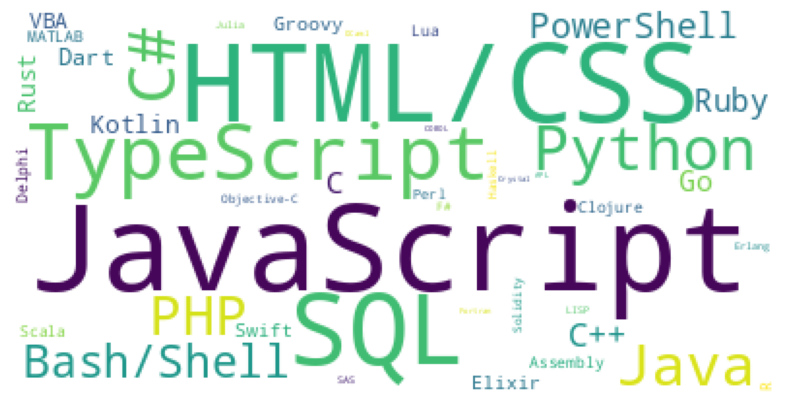

In [22]:
# 워드 클라우드 그리기
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
# plotly.express 모듈 탑재
import plotly.express as px

# 트리맵 그리기
fig = px.treemap(size_by_languages_df, path=['language'], values='count')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [24]:
languages.head()

3                     [C#, JavaScript, SQL, TypeScript]
12          [C, HTML/CSS, Rust, SQL, Swift, TypeScript]
15    [Bash/Shell, HTML/CSS, JavaScript, SQL, TypeSc...
16                           [C#, Java, PHP, Python, R]
21                            [Python, SQL, TypeScript]
Name: LanguageHaveWorkedWith, dtype: object

In [25]:
# 결손치 제거
languages.dropna(inplace=True)

# 필터링을 위한 리스트로 변환
lang_list = languages.to_list()

# 일부 값 확인
lang_list[:10]

[['C#', 'JavaScript', 'SQL', 'TypeScript'],
 ['C', 'HTML/CSS', 'Rust', 'SQL', 'Swift', 'TypeScript'],
 ['Bash/Shell', 'HTML/CSS', 'JavaScript', 'SQL', 'TypeScript'],
 ['C#', 'Java', 'PHP', 'Python', 'R'],
 ['Python', 'SQL', 'TypeScript'],
 ['C#', 'C++', 'JavaScript', 'PHP', 'TypeScript'],
 ['C#', 'JavaScript', 'PowerShell', 'SQL'],
 ['C#', 'HTML/CSS', 'JavaScript', 'SQL'],
 ['C#', 'HTML/CSS', 'SQL', 'TypeScript'],
 ['HTML/CSS', 'JavaScript', 'PHP']]

In [26]:
# 추출 대상 프로그래밍 언어 선정
target_langs = ['Python', 'R', 'SQL','Bash/Shell', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']

In [27]:
# 필터링 완료된 프로그래밍 언어를 담기 위한 리스트 생성
revised_lang_list = []

# 필터링을 위해 전체 리스트 순회
for lang in lang_list:

    # 추출 대상 프로그래밍 언어만 필터링
    filtered = [x for x in lang if x in target_langs]

    # 해당 리스트에 파이썬이 있는 경우에만 학습 대상 리스트에 추가
#     if 'Python' in filtered:
#         revised_lang_list.append(filtered)

    revised_lang_list.append(filtered)

# 필터링 결과 확인
revised_lang_list

[['JavaScript', 'SQL'],
 ['SQL'],
 ['Bash/Shell', 'JavaScript', 'SQL'],
 ['Java', 'Python', 'R'],
 ['Python', 'SQL'],
 ['JavaScript'],
 ['JavaScript', 'SQL'],
 ['JavaScript', 'SQL'],
 ['SQL'],
 ['JavaScript'],
 ['JavaScript'],
 [],
 ['Go', 'JavaScript', 'SQL'],
 ['Java', 'JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'SQL'],
 ['Go', 'JavaScript', 'SQL'],
 ['JavaScript', 'SQL'],
 ['JavaScript'],
 ['Java', 'JavaScript', 'Python', 'SQL'],
 ['Go', 'Java', 'JavaScript', 'SQL'],
 ['JavaScript'],
 ['Bash/Shell', 'JavaScript', 'Python'],
 ['SQL'],
 ['SQL'],
 ['JavaScript', 'SQL'],
 ['JavaScript', 'SQL'],
 ['Bash/Shell', 'Java', 'JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['Bash/Shell', 'Go', 'Java', 'JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['JavaScript', 'Python'],
 ['JavaScript', 'SQL'],
 ['JavaScript', 'SQL'],
 ['Bash/Shell', 'JavaScript', 'SQL'],
 ['Bash/Shell', 'JavaScript'],
 ['Bash/Shell', 'Go', 'Java', 'JavaScript', 'Python', 'SQL'],
 ['Java'],
 ['Jav

In [28]:
# 전처리 라이브러리 탑재
from mlxtend.preprocessing import TransactionEncoder

# 전처리기 생성
te = TransactionEncoder()

# 전처리 수행
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False,  True, False],
       ...,
       [False, False,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [ True, False,  True, ..., False,  True, False]])

In [29]:
# 전치리 결과를 데이터프레임으로 변환
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Bash/Shell,Go,Java,JavaScript,Julia,Python,R,SAS,SQL,Scala
0,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,True,False,False,True,False,False,False,False,True,False
3,False,False,True,False,False,True,True,False,False,False
4,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
7105,False,False,False,True,False,False,False,False,False,False
7106,False,False,False,True,False,False,False,False,False,False
7107,False,False,True,True,False,True,False,False,False,True
7108,True,False,False,True,False,False,False,False,False,False


In [30]:
# 학습 알고리즘 탑재
from mlxtend.frequent_patterns import apriori, association_rules

# 지지도 구하기
freq_items = apriori(new_languages, min_support=0.01, use_colnames=True, verbose=1)

Processing 25 combinations | Sampling itemset size 5


In [31]:
# 학습 결과 확인하기
freq_items.sort_values(['support'], ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
3,0.868214,(JavaScript)
6,0.596203,(SQL)
22,0.540084,"(JavaScript, SQL)"
4,0.327426,(Python)
2,0.295499,(Java)
20,0.293952,"(JavaScript, Python)"
17,0.256821,"(JavaScript, Java)"
0,0.220816,(Bash/Shell)
25,0.207876,"(SQL, Python)"
10,0.200703,"(JavaScript, Bash/Shell)"


In [32]:
# 항목 집합의 항목 개수 추가하기
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,length
0,0.220816,(Bash/Shell),1
1,0.082841,(Go),1
2,0.295499,(Java),1
3,0.868214,(JavaScript),1
4,0.327426,(Python),1
...,...,...,...
61,0.026864,"(JavaScript, SQL, Go, Python)",4
62,0.083404,"(JavaScript, SQL, Python, Java)",4
63,0.013643,"(JavaScript, SQL, Bash/Shell, Go, Python)",5
64,0.034177,"(JavaScript, SQL, Bash/Shell, Java, Python)",5


In [33]:
# 신뢰도와 향상도 구하기
rules = association_rules(freq_items, min_threshold=0.01)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bash/Shell),(Go),0.220816,0.082841,0.031364,0.142038,1.714587,0.013072,1.068997,0.534879
1,(Go),(Bash/Shell),0.082841,0.220816,0.031364,0.378608,1.714587,0.013072,1.253933,0.454413
2,(Bash/Shell),(Java),0.220816,0.295499,0.082560,0.373885,1.265266,0.017309,1.125194,0.269067
3,(Java),(Bash/Shell),0.295499,0.220816,0.082560,0.279391,1.265266,0.017309,1.081285,0.297590
4,(JavaScript),(Bash/Shell),0.868214,0.220816,0.200703,0.231168,1.046882,0.008988,1.013465,0.339810
...,...,...,...,...,...,...,...,...,...,...
439,(JavaScript),"(SQL, Go, Java, Python)",0.868214,0.013080,0.012518,0.014418,1.102251,0.001161,1.001357,0.703908
440,(SQL),"(JavaScript, Go, Java, Python)",0.596203,0.015612,0.012518,0.020996,1.344848,0.003210,1.005499,0.635025
441,(Go),"(JavaScript, SQL, Python, Java)",0.082841,0.083404,0.012518,0.151104,1.811714,0.005608,1.079750,0.488505
442,(Java),"(JavaScript, SQL, Go, Python)",0.295499,0.026864,0.012518,0.042361,1.576886,0.004579,1.016183,0.519288


In [34]:
# 산점도 그래프 그리기
fig=px.scatter(
    rules['support'],
    rules['confidence'],
    size=rules['lift'],
    color=rules['lift']
)

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='support',
    yaxis_title='confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title=('Support vs Confidence')

)

# 그래프 출력
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
# frozenset 데이터를 문자열로 변환하여 열 추가
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_str,consequents_str
0,(Bash/Shell),(Go),0.220816,0.082841,0.031364,0.142038,1.714587,0.013072,1.068997,0.534879,Bash/Shell,Go
1,(Go),(Bash/Shell),0.082841,0.220816,0.031364,0.378608,1.714587,0.013072,1.253933,0.454413,Go,Bash/Shell
2,(Bash/Shell),(Java),0.220816,0.295499,0.082560,0.373885,1.265266,0.017309,1.125194,0.269067,Bash/Shell,Java
3,(Java),(Bash/Shell),0.295499,0.220816,0.082560,0.279391,1.265266,0.017309,1.081285,0.297590,Java,Bash/Shell
4,(JavaScript),(Bash/Shell),0.868214,0.220816,0.200703,0.231168,1.046882,0.008988,1.013465,0.339810,JavaScript,Bash/Shell
...,...,...,...,...,...,...,...,...,...,...,...,...
439,(JavaScript),"(SQL, Go, Java, Python)",0.868214,0.013080,0.012518,0.014418,1.102251,0.001161,1.001357,0.703908,JavaScript,"SQL,Go,Java,Python"
440,(SQL),"(JavaScript, Go, Java, Python)",0.596203,0.015612,0.012518,0.020996,1.344848,0.003210,1.005499,0.635025,SQL,"JavaScript,Go,Java,Python"
441,(Go),"(JavaScript, SQL, Python, Java)",0.082841,0.083404,0.012518,0.151104,1.811714,0.005608,1.079750,0.488505,Go,"JavaScript,SQL,Python,Java"
442,(Java),"(JavaScript, SQL, Go, Python)",0.295499,0.026864,0.012518,0.042361,1.576886,0.004579,1.016183,0.519288,Java,"JavaScript,SQL,Go,Python"


In [36]:
# 산점도 그래프 그리기
fig=px.scatter(
    rules,
    x='support',
    y='confidence',
    size='lift',
    color='lift',
    hover_data=['antecedents_str', 'consequents_str']
    )


# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='support',
    yaxis_title='confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title=('Support vs Confidence')

)

# 그래프 출력
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [37]:
# 항목이 하나인 값만 필터링하기
rules_for_single = rules[rules.apply(lambda x: (len(x['antecedents']) == 1 and len(x['consequents']) == 1), axis=1)]
rules_for_single.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_str,consequents_str
0,(Bash/Shell),(Go),0.220816,0.082841,0.031364,0.142038,1.714587,0.013072,1.068997,0.534879,Bash/Shell,Go
1,(Go),(Bash/Shell),0.082841,0.220816,0.031364,0.378608,1.714587,0.013072,1.253933,0.454413,Go,Bash/Shell
2,(Bash/Shell),(Java),0.220816,0.295499,0.082560,0.373885,1.265266,0.017309,1.125194,0.269067,Bash/Shell,Java
3,(Java),(Bash/Shell),0.295499,0.220816,0.082560,0.279391,1.265266,0.017309,1.081285,0.297590,Java,Bash/Shell
4,(JavaScript),(Bash/Shell),0.868214,0.220816,0.200703,0.231168,1.046882,0.008988,1.013465,0.339810,JavaScript,Bash/Shell
5,(Bash/Shell),(JavaScript),0.220816,0.868214,0.200703,0.908917,1.046882,0.008988,1.446884,0.057473,Bash/Shell,JavaScript
6,(Bash/Shell),(Python),0.220816,0.327426,0.108579,0.491720,1.501773,0.036279,1.323234,0.428808,Bash/Shell,Python
7,(Python),(Bash/Shell),0.327426,0.220816,0.108579,0.331615,1.501773,0.036279,1.165772,0.496779,Python,Bash/Shell
8,(SQL),(Bash/Shell),0.596203,0.220816,0.155556,0.260911,1.181576,0.023905,1.054249,0.380569,SQL,Bash/Shell
9,(Bash/Shell),(SQL),0.220816,0.596203,0.155556,0.704459,1.181576,0.023905,1.366297,0.197223,Bash/Shell,SQL


In [38]:
# 프로그래밍 언어 문자열로 추출
rules_for_single_df = pd.DataFrame(rules_for_single['antecedents'].apply(lambda x: list(x)[0]))
rules_for_single_df['consequents'] = rules_for_single['consequents'].apply(lambda x: list(x)[0])
rules_for_single_df['confidence'] = rules_for_single['confidence']

rules_for_single_df.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,confidence
0,Bash/Shell,Go,0.142038
1,Go,Bash/Shell,0.378608
2,Bash/Shell,Java,0.373885
3,Java,Bash/Shell,0.279391
4,JavaScript,Bash/Shell,0.231168
5,Bash/Shell,JavaScript,0.908917
6,Bash/Shell,Python,0.491720
7,Python,Bash/Shell,0.331615
8,SQL,Bash/Shell,0.260911
9,Bash/Shell,SQL,0.704459


In [39]:
# 히트맵용 데이터프레임 생성, 색인은 대상 프로그래밍 언어로 설정
revised_rules_df = pd.DataFrame(index=target_langs)

# 대상 프로그래밍 언어 순회
for col in target_langs:

    # 열 설정을 위한 빈 리스트 생성
    col_conf = []
    for row in target_langs:

        # 신뢰도 확보, 조건 언어는 줄, 결과 언어는 행으로 설정
        confidence = rules_for_single_df[rules_for_single_df['antecedents'] == row][rules_for_single_df['consequents'] == col]['confidence']

        # 신뢰도 값이 존재하는 경우에만 행에 값 추가
        if len(confidence.values) > 0:
            col_conf.append(confidence.values[0])

        # 그렇지 않은 경우 0 설정
        else:
            col_conf.append(0)

    # 완성된 열을 데이터프레임에 추가
    revised_rules_df[col] = col_conf

# 최종 데이터프레임 값 확인
revised_rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-39-8845b116a329>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-39-8845b116a329>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-39-8845b116a329>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-39-8845b116a329>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-39-8845b116a329>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-39-8845b116a329>:12: UserWarning:

Boolean Series key will be reindexed to match DataFr

,Python,R,SQL,Bash/Shell,Go,SAS,Scala,Julia,Java,JavaScript
Python,0.000000,0.036512,0.634880,0.331615,0.126718,0,0.000000,0,0.378866,0.897766
R,0.752212,0.000000,0.805310,0.000000,0.000000,0,0.000000,0,0.000000,0.867257
SQL,0.348667,0.021467,0.000000,0.260911,0.082803,0,0.018636,0,0.322010,0.905874
Bash/Shell,0.491720,0.000000,0.704459,0.000000,0.142038,0,0.000000,0,0.373885,0.908917
Go,0.500849,0.000000,0.595925,0.378608,0.000000,0,0.000000,0,0.341256,0.893039
SAS,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000
Scala,0.000000,0.000000,0.681034,0.000000,0.000000,0,0.000000,0,0.000000,0.844828
Julia,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000
Java,0.419800,0.000000,0.649691,0.279391,0.095669,0,0.000000,0,0.000000,0.869110
JavaScript,0.338571,0.015876,0.622064,0.231168,0.085210,0,0.015876,0,0.295804,0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



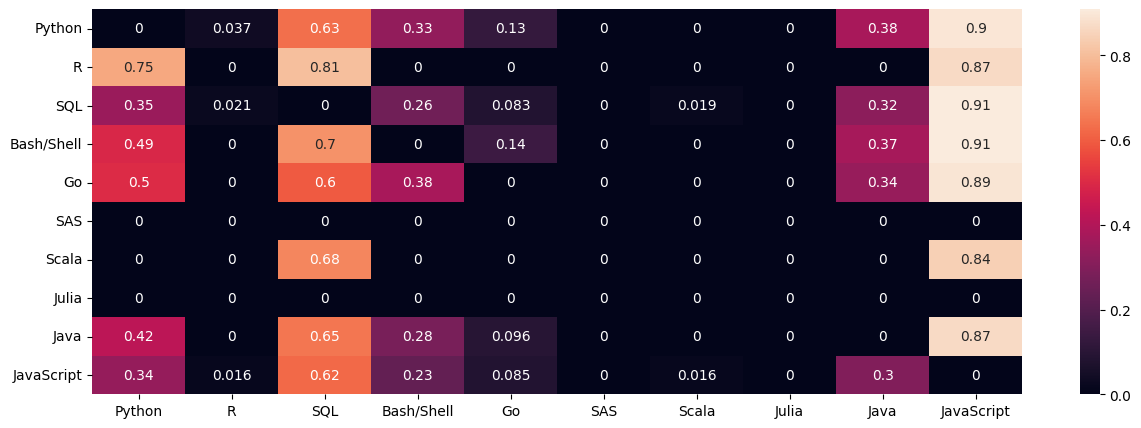

In [40]:
# Seaborn 라이브러리 탑재
import seaborn as sns

# 히트맵 크기 설정
plt.figure(figsize=(15, 5))

# 히트맵 그리기
heatmap = sns.heatmap(revised_rules_df, annot=True)